Dataset source [Fish](https://www.kaggle.com/aungpyaeap/fish-market)

In [17]:
import pandas as pd
data = pd.read_csv("Fish.csv")
data.head()
# data = data[['Weight','Length1','Length2','Length3', 'Height', 'Width']]
data = pd.DataFrame(data)
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.00,23.20,25.40,30.00,11.52,4.02
1,1,290.00,24.00,26.30,31.20,12.48,4.31
2,1,340.00,23.90,26.50,31.10,12.38,4.70
3,1,363.00,26.30,29.00,33.50,12.73,4.46
4,1,430.00,26.50,29.00,34.00,12.44,5.13


In [18]:
import dcor
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Species'], 
                                                                        data['Width'])))
print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(data['Species'], 
                                                                           data['Width'], 
                                                                           exponent=1.0, 
                                                                           num_resamples=2000)[0]))

distance correlation = 0.41
p-value = 0.0004998


In [19]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc

In [20]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


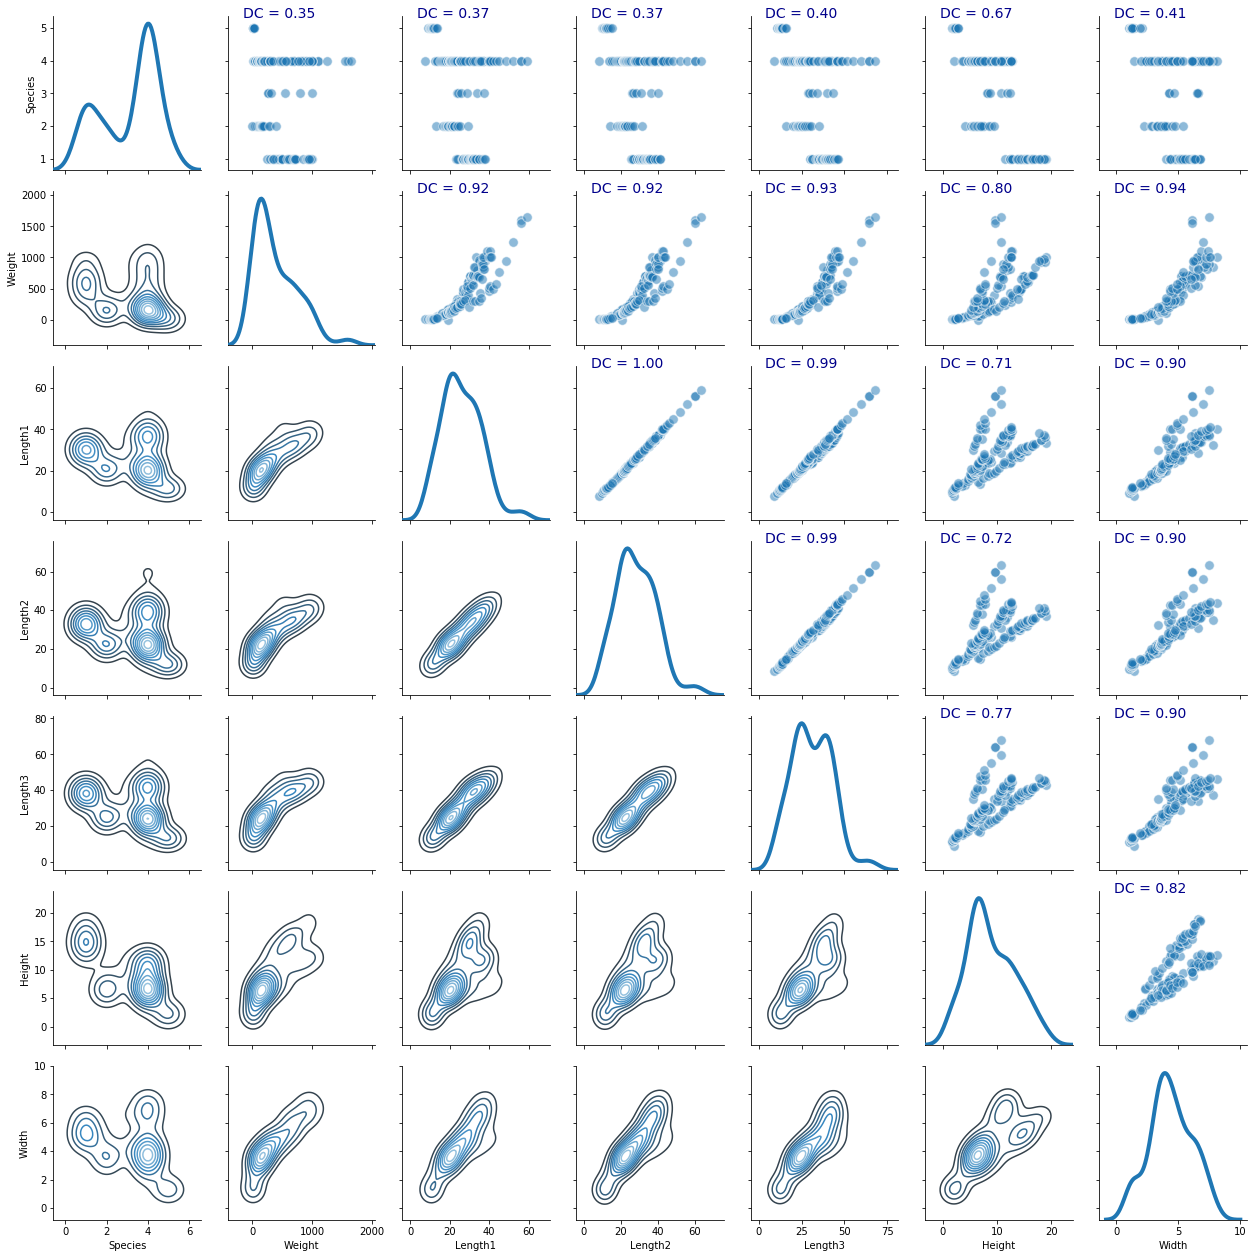

In [21]:
import seaborn as sns
from matplotlib import pyplot
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show();

In [22]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt


,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.00,0.35,0.37,0.37,0.40,0.67,0.41
Weight,0.35,1.00,0.92,0.92,0.93,0.80,0.94
Length1,0.37,0.92,1.00,1.00,0.99,0.71,0.90
Length2,0.37,0.92,1.00,1.00,0.99,0.72,0.90
Length3,0.40,0.93,0.99,0.99,1.00,0.77,0.90
Height,0.67,0.80,0.71,0.72,0.77,1.00,0.82
Width,0.41,0.94,0.90,0.90,0.90,0.82,1.00


In [23]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Species'], data['Length1'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Species'], data['Length2'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Species'], data['Length3'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Species'], data['Height'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Species'], data['Width'])))
#print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Random_2'])))

distance correlation = 0.37
distance correlation = 0.37
distance correlation = 0.40
distance correlation = 0.67
distance correlation = 0.41


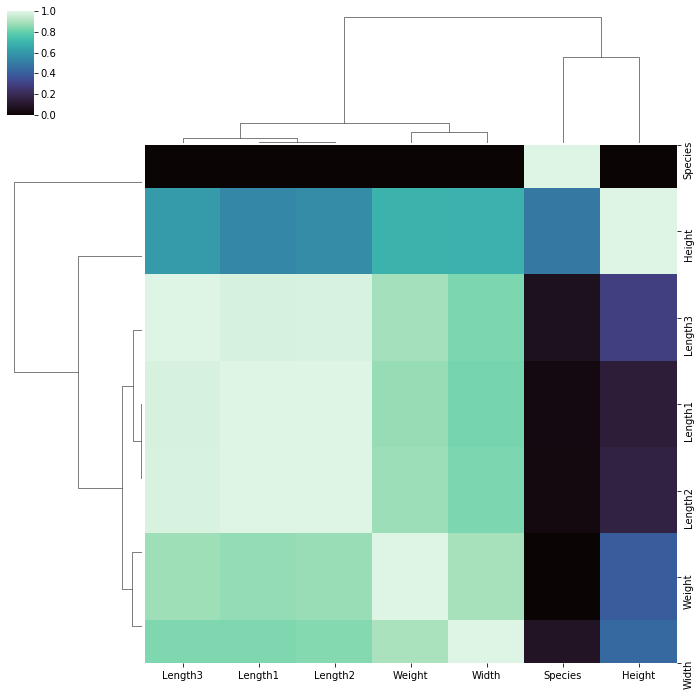

In [24]:
#data.rename(index=str, columns={"Gross_pay_transform": "Gross_pay_tr"}, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# h = heatmap.Heatmap(rslt)
# h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
# fig = plt.gcf()
# fig.set_size_inches(22, 18)
# plt.gcf().get_axes()[1].invert_xaxis();

# # heatmap
# ax = sns.heatmap(rslt, linewidth=0.5)
# fig = pyplot.gcf()
# fig.set_size_inches(12, 8)
# pyplot.gcf().get_axes()[1].invert_xaxis();
# pyplot.show()

# heatmp + dendrogram
g = sns.clustermap(rslt, cmap="mako",  standard_scale =1)
fig = pyplot.gcf()
fig.set_size_inches(12, 12);

### Correlation matrix ordered by relevant features

With distance correlation, p-value, and plots rearranged by clustering.

In [25]:
a = (g.dendrogram_col.reordered_ind)
a

[4, 2, 3, 1, 6, 0, 5]

In [26]:
b = list(data)
b

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [27]:
data = data[[b[i] for i in a]]
list(data)

['Length3', 'Length1', 'Length2', 'Weight', 'Width', 'Species', 'Height']

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


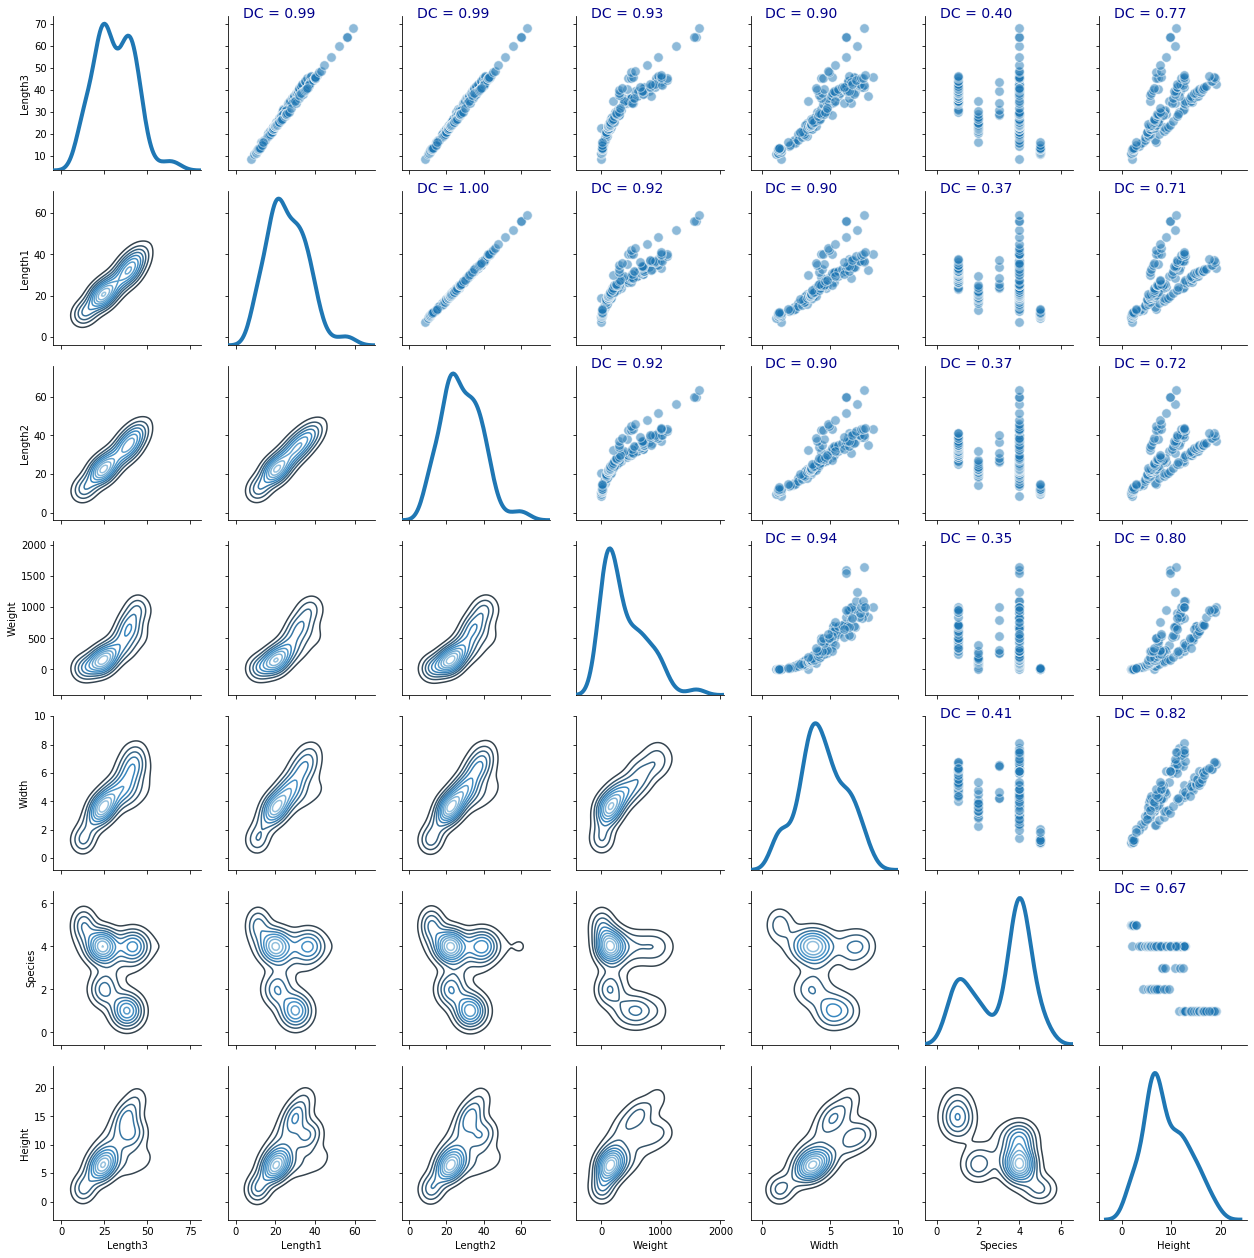

In [28]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

In [29]:
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('Species ~ Weight + Height + Width + Length1 + Length2 + Length3',
                            data,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag')#, njobs=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Length3, Length2, Length1, Width, Height, Weight, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [05:35<00:00,  7.54draws/s]
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The acceptance probability does not match the target. It is 0.896635680776981, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8967682488135899, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25483ac8>,
      dtype=object)

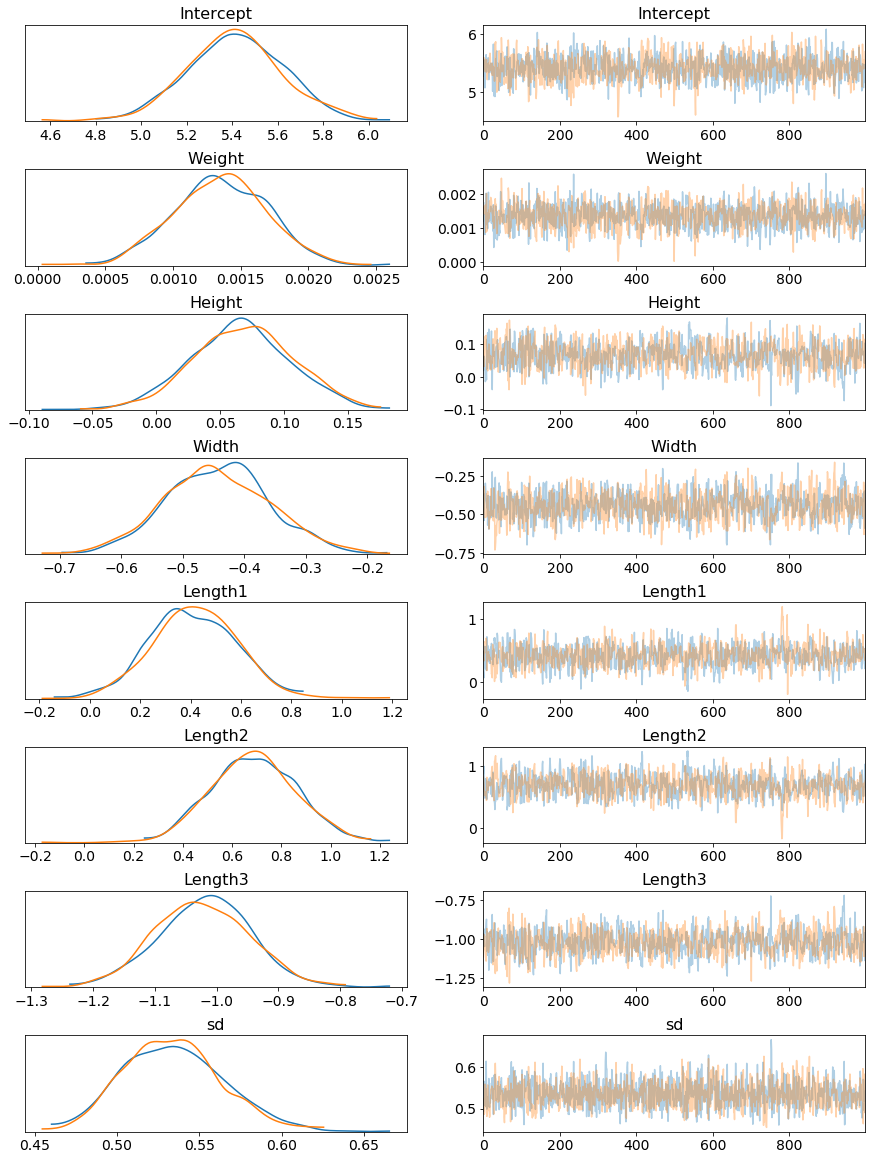

In [30]:
pm.traceplot(trace2)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c25695358>,
      dtype=object)

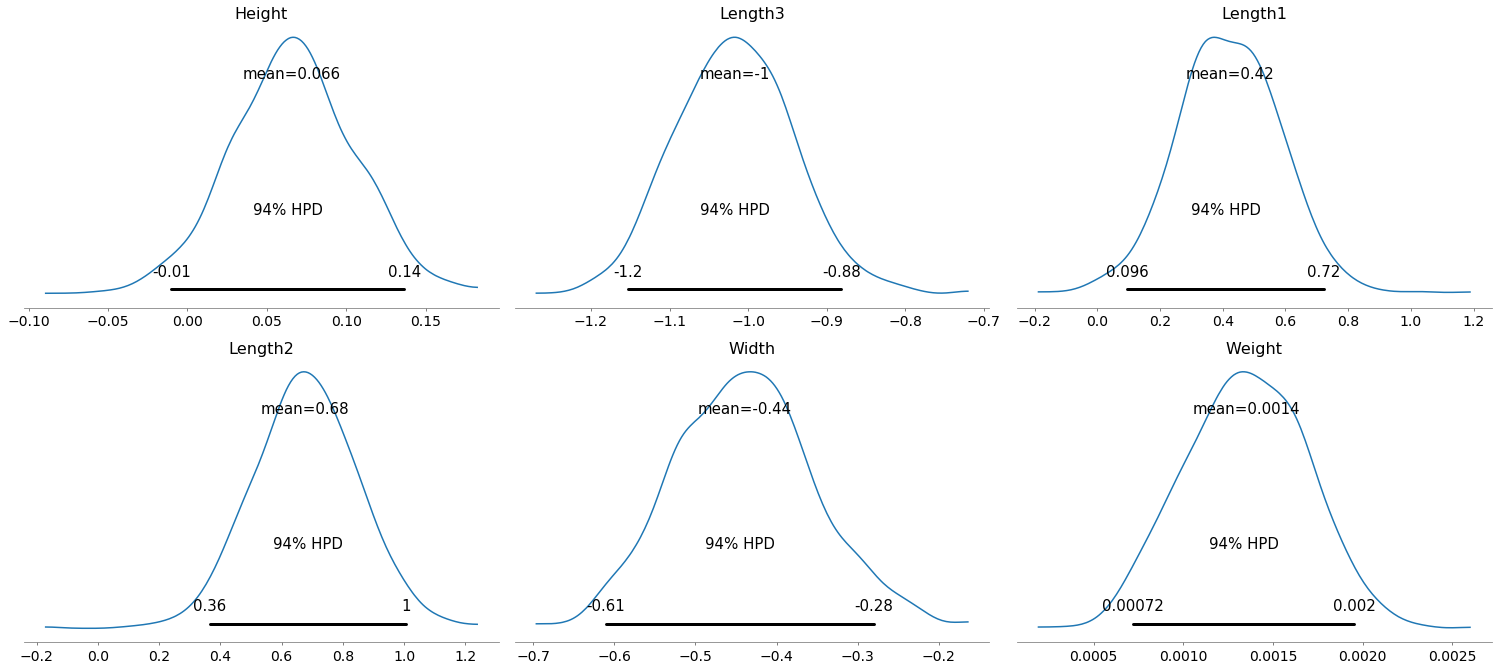

In [31]:
pm.plot_posterior(trace2[500:], varnames=['Height', 'Length3', 'Length1', 'Length2', 'Width', 'Weight'])


In [32]:
import numpy as np
import scipy.stats as st

def confInt(r, nwells):
    z_crit = st.norm.ppf(.975)
    std_Z = 1/np.sqrt(nwells-3)      
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1) 
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

In [33]:
from sklearn.ensemble import RandomForestRegressor #ML Algorithm (simplest one)
from sklearn import metrics
from sklearn.model_selection import train_test_split

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [34]:
data.head()

,Length3,Length1,Length2,Weight,Width,Species,Height
0,30.00,23.20,25.40,242.00,4.02,1,11.52
1,31.20,24.00,26.30,290.00,4.31,1,12.48
2,31.10,23.90,26.50,340.00,4.70,1,12.38
3,33.50,26.30,29.00,363.00,4.46,1,12.73
4,34.00,26.50,29.00,430.00,5.13,1,12.44


In [35]:
data.columns

Index(['Length3', 'Length1', 'Length2', 'Weight', 'Width', 'Species',
       'Height'],
      dtype='object')

In [37]:
data_Species = data[['Species']]

In [38]:
data_Species = np.asarray(data_Species)

In [39]:
y = data_Species
y = np.asarray(data_Species)
y = np.reshape(y,159)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [40]:
data_Length1 = data[['Length1']]
x = np.asarray(data_Length1)
x = np.reshape(x,159)
x

array([23.2, 24. , 23.9, 26.3, 26.5, 26.8, 26.8, 27.6, 27.6, 28.5, 28.4,
       28.7, 29.1, 29.5, 29.4, 29.4, 30.4, 30.4, 30.9, 31. , 31.3, 31.4,
       31.5, 31.8, 31.9, 31.8, 32. , 32.7, 32.8, 33.5, 35. , 35. , 36.2,
       37.4, 38. , 12.9, 16.5, 17.5, 18.2, 18.6, 19. , 19.1, 19.4, 20.4,
       20.5, 20.5, 21. , 21.1, 22. , 22. , 22.1, 23.6, 24. , 25. , 29.5,
       23.6, 24.1, 25.6, 28.5, 33.7, 37.3, 13.5, 14.3, 16.3, 17.5, 18.4,
       19. , 19. , 19.8, 21.2, 23. , 24. ,  7.5, 12.5, 13.8, 15. , 15.7,
       16.2, 16.8, 17.2, 17.8, 18.2, 19. , 19. , 19. , 19.3, 20. , 20. ,
       20. , 20. , 20. , 20.5, 20.5, 20.7, 21. , 21.5, 22. , 22. , 22.6,
       23. , 23.5, 25. , 25.2, 25.4, 25.4, 25.4, 25.9, 26.9, 27.8, 30.5,
       32. , 32.5, 34. , 34. , 34.5, 34.6, 36.5, 36.5, 36.6, 36.9, 37. ,
       37. , 37.1, 39. , 39.8, 40.1, 40.2, 41.1, 30. , 31.7, 32.7, 34.8,
       35.5, 36. , 40. , 40. , 40.1, 42. , 43.2, 44.8, 48.3, 52. , 56. ,
       56. , 59. ,  9.3, 10. , 10.1, 10.4, 10.7, 10

In [41]:
N = len(y)
N

159

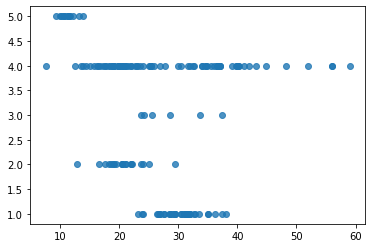

In [42]:
sns.regplot(x, y, fit_reg=False)

In [43]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [44]:
X = x.reshape(-1, 1)
X.shape

(159, 1)

In [45]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [46]:
gp.kernel_

3.66**2 + Matern(length_scale=9.05, nu=1.5) + WhiteKernel(noise_level=1.17)

In [47]:
x_pred = np.linspace(0, 20).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

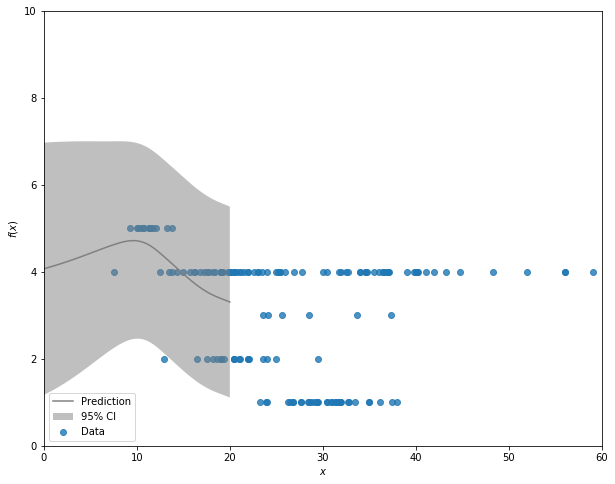

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0,60)
plt.ylim(0, 10)
plt.legend(loc='lower left');

In [54]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as gp_fit:

    ρ = pm.Gamma('ρ', 1, 1)
    η = pm.Gamma('η', 1, 1)
    
    K = η * pm.gp.cov.Matern32(1, ρ)

In [55]:
with gp_fit:
    
    M = pm.gp.mean.Zero()
    σ = pm.HalfCauchy('σ', 2.5)

In [56]:
with gp_fit:

    gp = pm.gp.Marginal(mean_func=M, cov_func=K)

In [57]:
with gp_fit:
    
    y_obs = gp.marginal_likelihood('y_obs', X=X, y=y, noise=σ)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


In [58]:
with gp_fit:
    
    trace = pm.sample(2000, n_init=500)#, njobs=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional inde

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


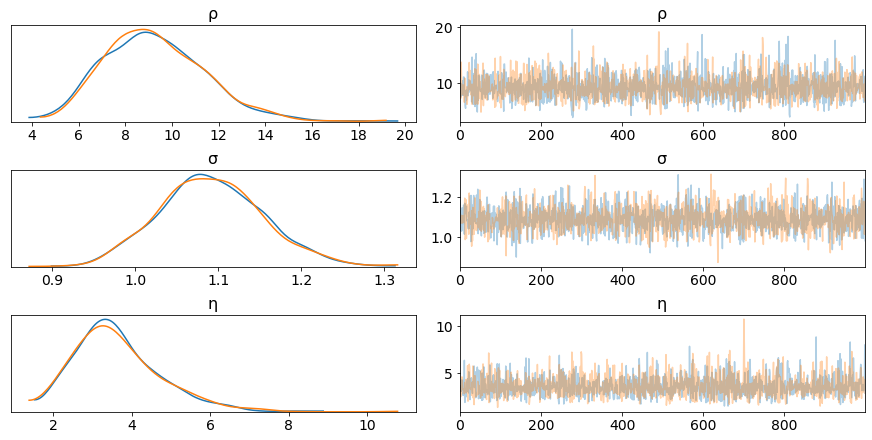

In [59]:
pm.traceplot(trace[-1000:], varnames=['ρ', 'σ', 'η']);

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c29296a90>,
      dtype=object)

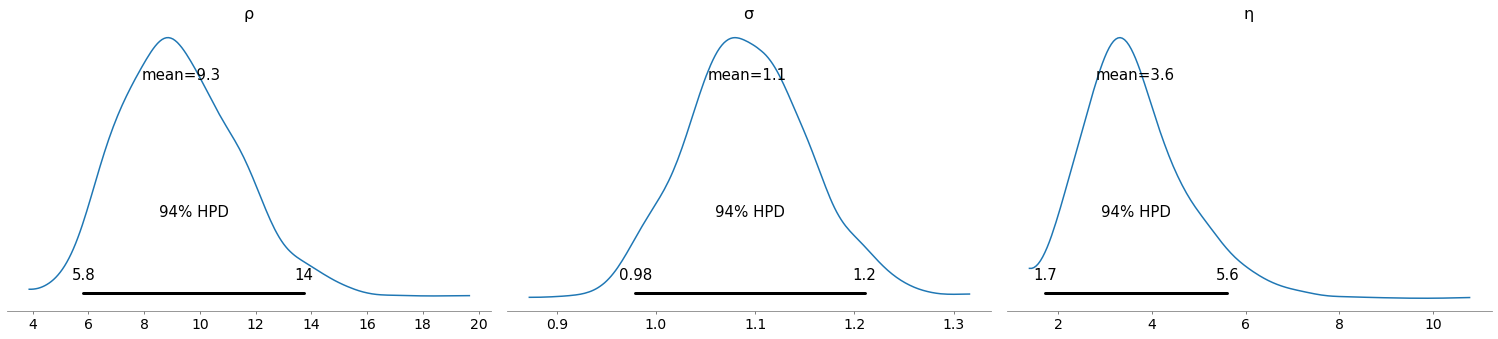

In [60]:
pm.plot_posterior(trace[-1000:], varnames=['ρ', 'σ', 'η'])

In [61]:
ρm = trace[-1000:]['ρ'].mean()
ρm 

9.314126713427816

In [62]:
σm = trace[-1000:]['σ'].mean()
σm 

1.091834226007329

In [64]:
ηm = trace[-1000:]['η'].mean()
ηm 

3.649085446473342

In [65]:
mm = [ρm, σm, ηm]

In [66]:
pd.DataFrame({"Parameter": ['ρ', 'σ', 'η'],
              "best approximation": [ρm, σm, ηm]})

,Parameter,best approximation
0,ρ,9.31
1,σ,1.09
2,η,3.65


In [67]:
with gp_fit:
    mp = pm.find_MAP()

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of 

In [68]:
mp

{'ρ_log__': array(2.16318647),
 'η_log__': array(1.14908964),
 'σ_log__': array(0.07811682),
 'ρ': array(8.69881204),
 'η': array(3.15531912),
 'σ': array(1.08124896)}

In [69]:
# "mp" stands for marginal posterior
pd.DataFrame({"Parameter": ['ρ', 'σ', 'η'],
              "Value at MAP": [float(mp["ρ"]), float(mp["σ"]), float(mp["η"])]})

,Parameter,Value at MAP
0,ρ,8.70
1,σ,1.08
2,η,3.16


In [70]:
Z = np.linspace(-6, 6, 100).reshape(-1, 1)

with gp_fit:

    y_pred = gp.conditional("y_pred", Xnew=Z, pred_noise=True)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


In [71]:
# To use the point estimate hyperparameter values, replace the trace with a length-1 list with `mm`
with gp_fit:
    y_samples = pm.sample_ppc([mp], vars=[y_pred], samples=500)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
  0%|          | 0/500 [00:00<?, ?it/s]/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either 

In [72]:
y_samples["y_pred"]

array([[ 0.1567649 ,  0.37309004, -0.57945209, ...,  2.37810815,
         2.16593603,  1.67244153],
       [ 3.88344555,  1.87430762,  3.62385777, ...,  4.67000152,
         3.47170426,  2.82040304],
       [ 1.07584504,  3.64141455,  0.58107459, ...,  3.39393986,
         5.6915659 ,  2.47466405],
       ...,
       [-3.1971636 , -2.67043759, -1.69800905, ...,  1.0660417 ,
         2.41260593,  2.5523554 ],
       [ 0.95461695,  2.44658868,  2.23101779, ...,  3.41175167,
         5.1211154 ,  5.86103242],
       [ 1.90303723,  2.86126869,  3.05148602, ...,  5.11308723,
         6.33508262,  4.92579119]])

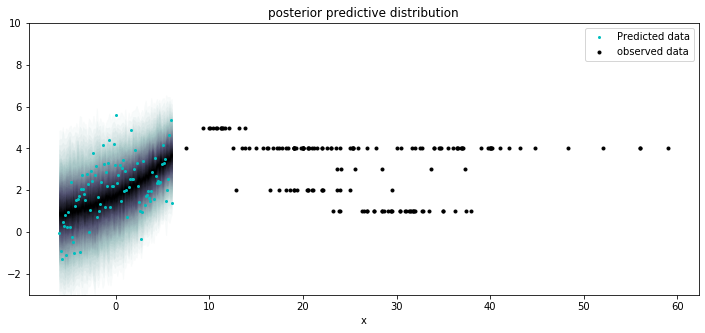

In [74]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, y_samples["y_pred"], Z, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the posterior predictive distribution
plt.plot(Z, y_samples["y_pred"][200, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
#plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-3,10]);
plt.title("posterior predictive distribution"); plt.legend();